In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import warnings
warnings.simplefilter('ignore')
import mplfinance as mpf
from pandas.plotting import lag_plot
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Downloading the stock data
start = '2015-01-01'
end = '2020-07-30'
ticker0 = 'KO'
interval = "1d"
df0 =yf.download(ticker0,start,end,interval)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Downloading the stock data
start = '2015-01-01'
end = '2020-07-30'
ticker1 = '^GSPC'
interval = "1d"
df1 =yf.download(ticker1,start,end,interval)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculating the stock return
df0['Return'] =100*df0['Adj Close'].pct_change()
df0.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df0.dropna(inplace=True)

In [5]:
# Calculating the stock return
df1['Return'] =100*df1['Adj Close'].pct_change()
df1.drop(['Dividends','Stock Splits'],axis=1,inplace=True)
df1.dropna(inplace=True)

In [6]:
# Information summary of the stock data
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2015-01-05 to 2020-07-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1402 non-null   float64
 1   High       1402 non-null   float64
 2   Low        1402 non-null   float64
 3   Close      1402 non-null   float64
 4   Adj Close  1402 non-null   float64
 5   Volume     1402 non-null   int64  
 6   Return     1402 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [7]:
# Information summary of the stock data
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2015-01-05 to 2020-07-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1402 non-null   float64
 1   High       1402 non-null   float64
 2   Low        1402 non-null   float64
 3   Close      1402 non-null   float64
 4   Adj Close  1402 non-null   float64
 5   Volume     1402 non-null   int64  
 6   Return     1402 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [8]:
# Describtive statistical summary of stock data
df0.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1.402000e+03,1402.000000
mean,45.535050,45.832389,45.230521,45.535207,41.112052,1.352226e+07,0.029406
std,4.290157,4.325128,4.254690,4.295859,5.741301,5.892750e+06,1.194993
min,37.990002,38.189999,36.270000,37.560001,31.727221,2.996300e+06,-9.672477
25%,42.310001,42.592500,42.062501,42.352499,36.591059,9.809675e+06,-0.436890
50%,45.000000,45.275000,44.650002,44.960001,40.151541,1.226600e+07,0.040883
75%,46.747500,47.090000,46.447500,46.730000,44.287680,1.550590e+07,0.560489
max,59.810001,60.130001,59.619999,60.130001,58.140400,5.890540e+07,6.479578


In [9]:
# Describtive statistical summary of stock data
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1.402000e+03,1402.000000
mean,2511.636362,2523.908308,2497.879622,2511.823886,2511.823886,3.801806e+09,0.039815
std,389.906236,391.669740,388.074117,389.934079,389.934079,9.495819e+08,1.183277
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-11.984055
25%,2110.444946,2117.667419,2103.047485,2110.410034,2110.410034,3.261225e+09,-0.313572
50%,2499.164917,2511.280029,2489.665039,2501.410034,2501.410034,3.577200e+09,0.056492
75%,2829.867493,2843.505005,2812.955017,2832.105042,2832.105042,4.038660e+09,0.505120
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,9.382774


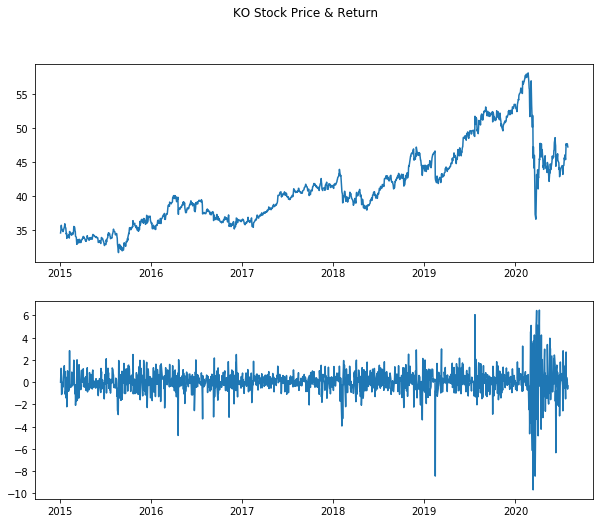

In [10]:
# Plotting Stock Price and Return
fig, axs = plt.subplots(2,figsize=(10,8))
fig.suptitle(ticker0+' Stock Price & Return')
axs[0].plot(df0.index, df0['Adj Close'])
axs[1].plot(df0.index, df0['Return'])
plt.show()

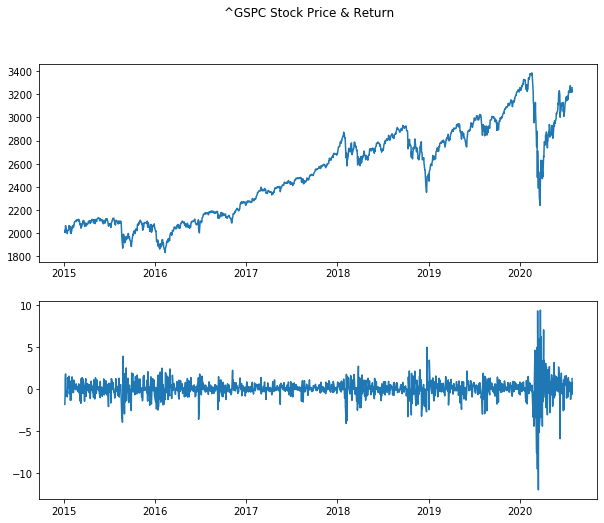

In [11]:
# Plotting Stock Price and Return
fig, axs = plt.subplots(2,figsize=(10,8))
fig.suptitle(ticker1+' Stock Price & Return')
axs[0].plot(df1.index, df1['Adj Close'])
axs[1].plot(df1.index, df1['Return'])
plt.show()

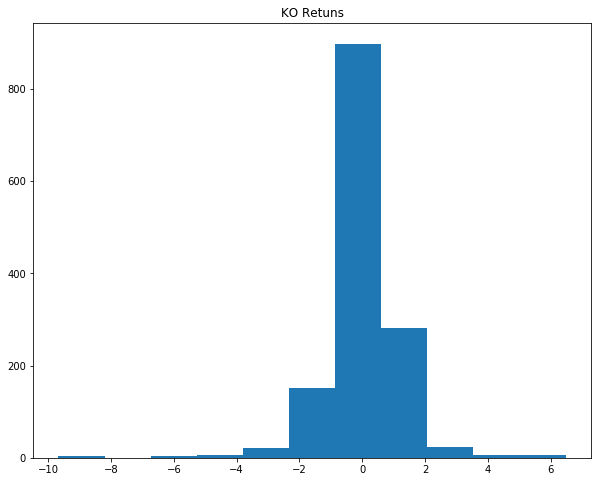

In [12]:
# Visualizing Distribution of Stock Returns
bins = int(round(1 + (3.322*np.log10(len(df0)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df0['Return'].values,bins=bins)
plt.xlabel = 'Returns'
plt.ylabel = 'Frequency'
plt.title(ticker0+' Retuns')
plt.show()

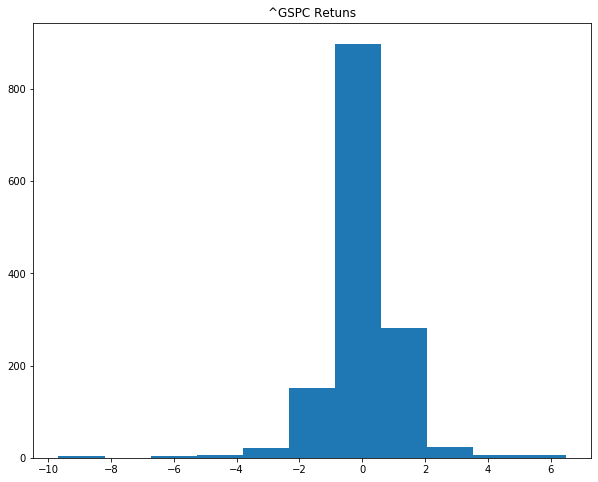

In [13]:
# Visualizing Distribution of Stock Returns
bins = int(round(1 + (3.322*np.log10(len(df1)))))

fig= plt.figure(figsize=(10,8))
plt.hist(df0['Return'].values,bins=bins)
plt.xlabel = 'Returns'
plt.ylabel = 'Frequency'
plt.title(ticker1+' Retuns')
plt.show()

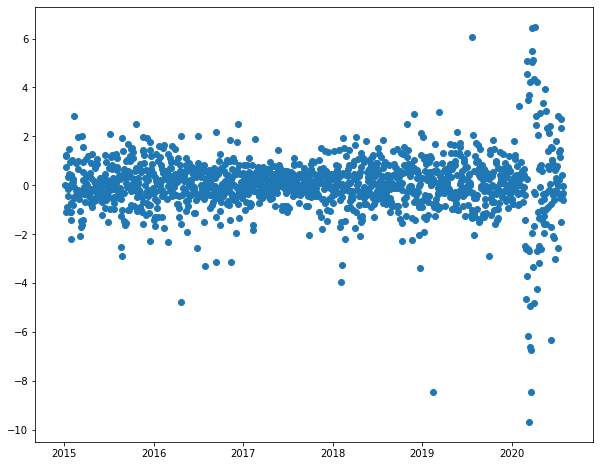

In [14]:
# The stock returns overtime
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df0.index,y=df0['Return'].values)
plt.show()

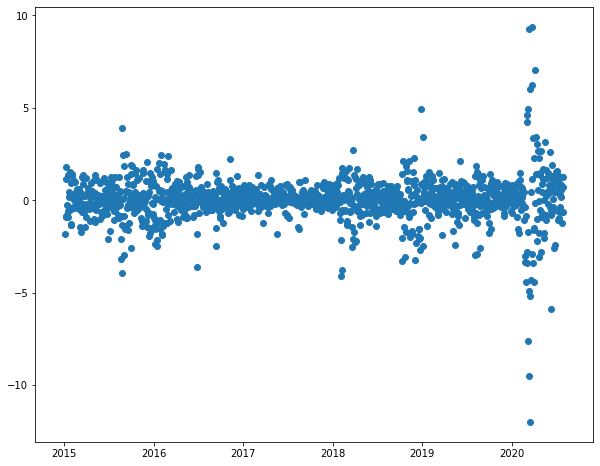

In [15]:
# The stock returns overtime
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df1.index,y=df1['Return'].values)
plt.show()

In [16]:

model0 = arch_model(df0['Return'], vol='Garch', p=1, o=0, q=1, dist='skewt')
res0 = model0.fit(disp='off')
resid0 = res0.resid
cond_vol0 = res0.conditional_volatility

In [17]:
model1 = arch_model(df1['Return'], vol='Garch', p=1, o=0, q=1, dist='skewt')
res1 = model1.fit(disp='off')
resid1 = res1.resid
cond_vol1 = res1.conditional_volatility

In [18]:
# Compute correlation between SP500 and Tesla
correlation = np.corrcoef(resid0,resid1)[0, 1]

In [19]:
# Compute the Beta for Tesla
stock_beta = correlation * (cond_vol0 /cond_vol1)


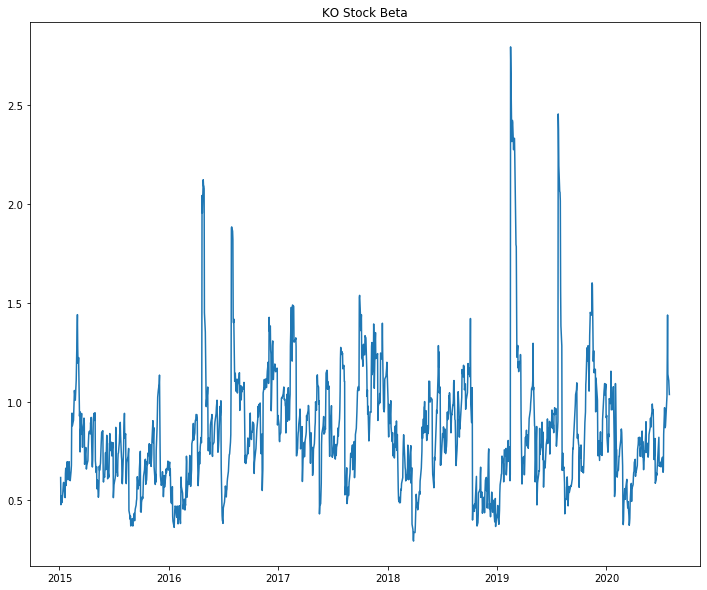

In [20]:
# Plot the Beta
fig = plt.figure(figsize=(12,10))
plt.title(ticker0+' Stock Beta')
plt.plot(stock_beta)
plt.show()